# Linear Regression

## Import all the required libraries:

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas_profiling import ProfileReport
%matplotlib inline

## Import data set from CSV file using PANDAS:

In [2]:
dataset = pd.read_csv('IceCreamData.csv', low_memory=False)

In [3]:
# Let's see shape of the data (number of rows and columns)
dataset.shape

(500, 2)

In [4]:
# Let's see some data
dataset.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Brief analysis of data

In [5]:
# let's see what is inside our dataset
dataset.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


## Plot dataset of temperature and revenue relation

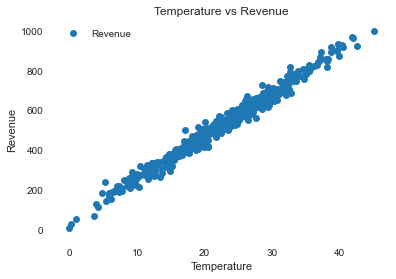

In [6]:
dataset.plot(x='Temperature', y='Revenue', style='o')  
plt.title('Temperature vs Revenue')  
plt.xlabel('Temperature')  
plt.ylabel('Revenue')  
plt.show()

## Plot revenue distribution using seaborn
Average maximum temperature which is in between 25 and 35.

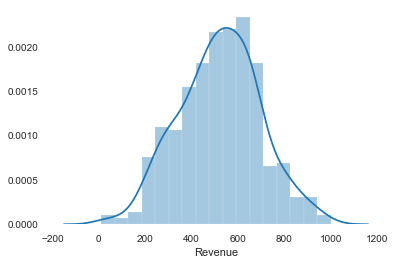

In [7]:
#plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Revenue'])

In [8]:
#profile = ProfileReport(dataset, title='Ice Cream Revenue Datasets', html={'style':{'full_width':True}})

## Prepare training data set
Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the Revenue depending upon the Temperature recorded. Therefore our attribute set will consist of the “Temperature” column which is stored in the X variable, and the label will be the “Revenue” column which is stored in y variable.

In [9]:
X = dataset['Temperature'].values.reshape(-1,1)
y = dataset['Revenue'].values.reshape(-1,1)

# split data set to training and test with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train linear regression model using sklearn library

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Retrieve parameters of the predicted formula

In [11]:
# y = mx + b

#To retrieve the intercept (b):
print(regressor.intercept_)
#For retrieving the slope (m) :
print(regressor.coef_)

[43.73357869]
[[21.5133908]]


## Use model to predict values

In [12]:
y_pred = regressor.predict(X_test)


### and compare predicted values with actual values

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) 
# flatten() used to reshape back to 'row' dimmension

df

,Actual,Predicted
0,704.281439,698.338556
1,632.901914,653.323311
2,662.558990,664.730275
3,449.813300,450.519285
4,636.298374,665.474697
...,...,...
95,506.222379,465.780600
96,749.367154,758.745585
97,684.158444,711.301255
98,381.564135,394.456810


### Plot bar chart with 25 records of comparision

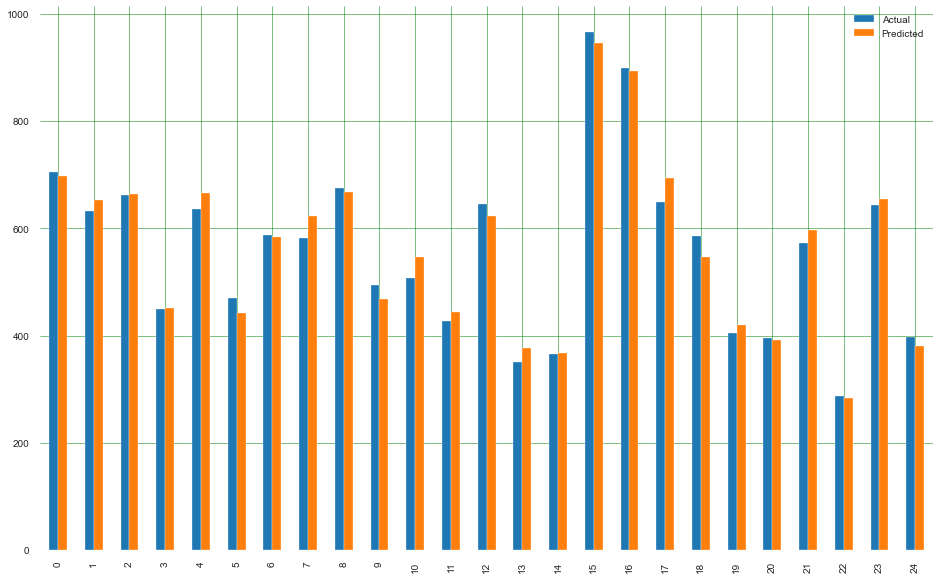

In [14]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Plot prediction line over test data set

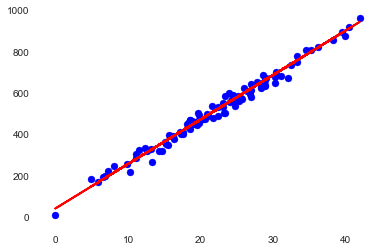

In [15]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Evaluate performance of the model

Mean Absolute Error (MAE) is the mean of the absolute value of the errors
Mean Squared Error (MSE) is the mean of the squared errors
Root Mean Squared Error (RMSE) is the square root of the mean

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.3032135301029
Mean Squared Error: 528.2150684519343
Root Mean Squared Error: 22.98292993619252
